In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles


In [3]:
np.random.seed(42)
X,Y = make_circles(n_samples=500 , factor=0.1 , noise=0.35 , random_state=42)

In [5]:
X


array([[-9.32386218e-02,  2.99041641e-01],
       [ 4.15898414e-01,  1.11023783e+00],
       [ 9.87505098e-02,  5.43766155e-02],
       [-3.18616104e-01, -4.98557102e-01],
       [-6.01736430e-01,  1.13675809e+00],
       [-9.36913945e-03, -1.40794778e-01],
       [ 5.63275761e-02,  3.92660379e-01],
       [-8.24184824e-01,  3.96353598e-01],
       [-3.71931480e-01,  6.86631947e-01],
       [-1.59861466e-01, -5.38689457e-01],
       [ 1.01313173e+00,  7.37618759e-02],
       [ 5.93211139e-01, -1.43861447e+00],
       [ 4.73069369e-01, -4.13685114e-01],
       [-9.47820332e-01,  5.68898692e-01],
       [ 5.83452928e-01, -3.99362660e-03],
       [ 9.05925986e-02, -9.64564692e-02],
       [ 6.76839485e-02, -1.89591342e-01],
       [ 7.46729013e-01,  8.57657068e-01],
       [ 5.78621809e-01, -5.56450745e-01],
       [ 4.96253827e-01,  1.11034838e-01],
       [-3.18586578e-02, -2.16572208e-01],
       [ 4.62739163e-01,  5.77154123e-02],
       [-4.64025929e-01,  1.95529072e-01],
       [ 3.

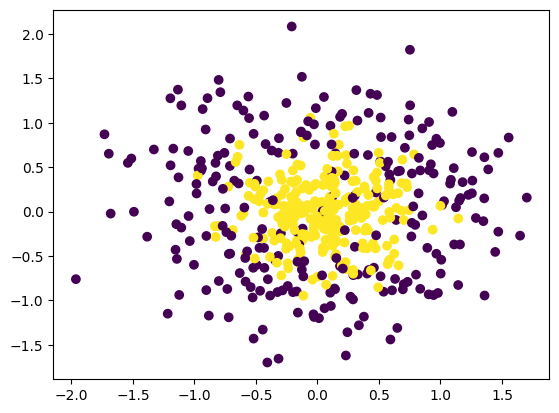

In [6]:
plt.scatter(X[:,0] , X[:,1] , c=Y)

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc , X , Y , scoring='accuracy' , cv=10))

np.float64(0.812)

In [8]:
abc.fit(X,Y)

AdaBoostClassifier()

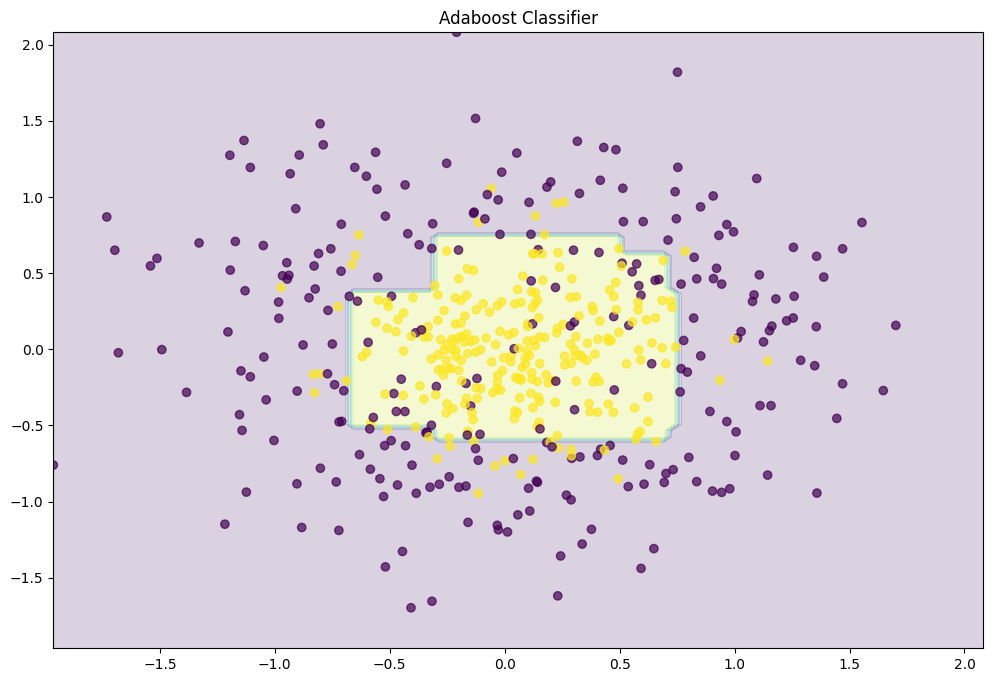

In [10]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

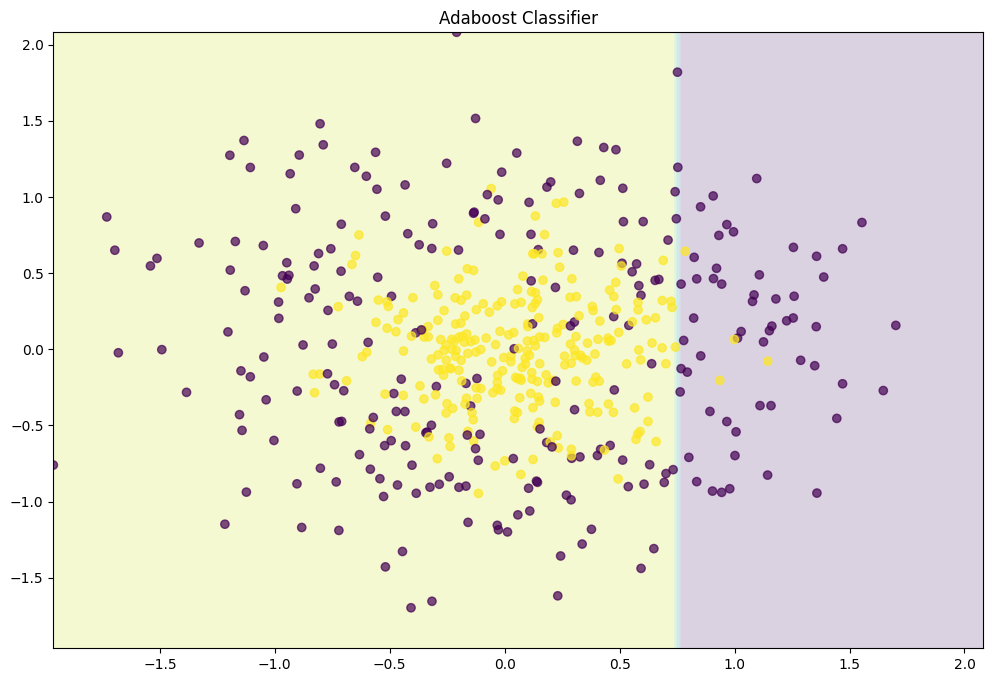

In [11]:
abc = AdaBoostClassifier(n_estimators=1)
abc.fit(X,Y)
plot_decision_boundary(abc)

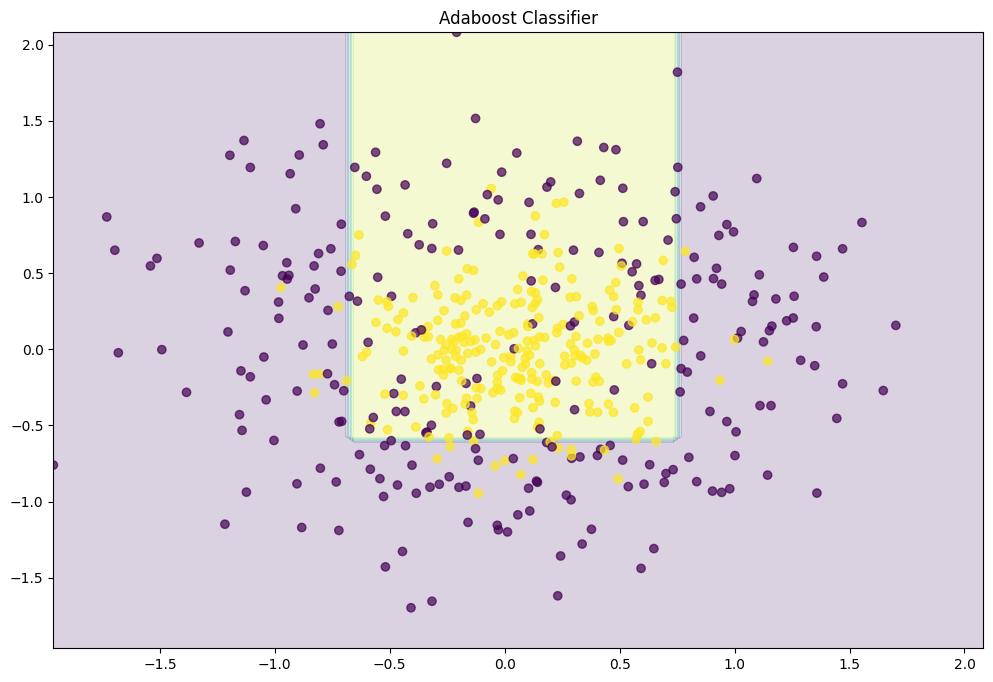

In [12]:
abc = AdaBoostClassifier(n_estimators=5)
abc.fit(X,Y)
plot_decision_boundary(abc)

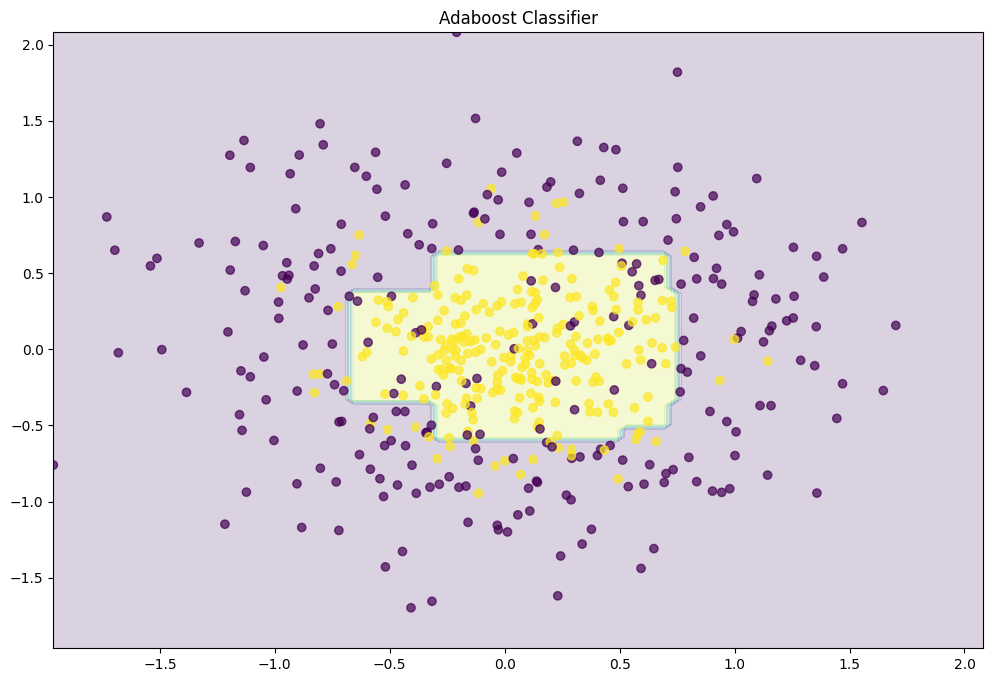

In [13]:
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X,Y)
plot_decision_boundary(abc)

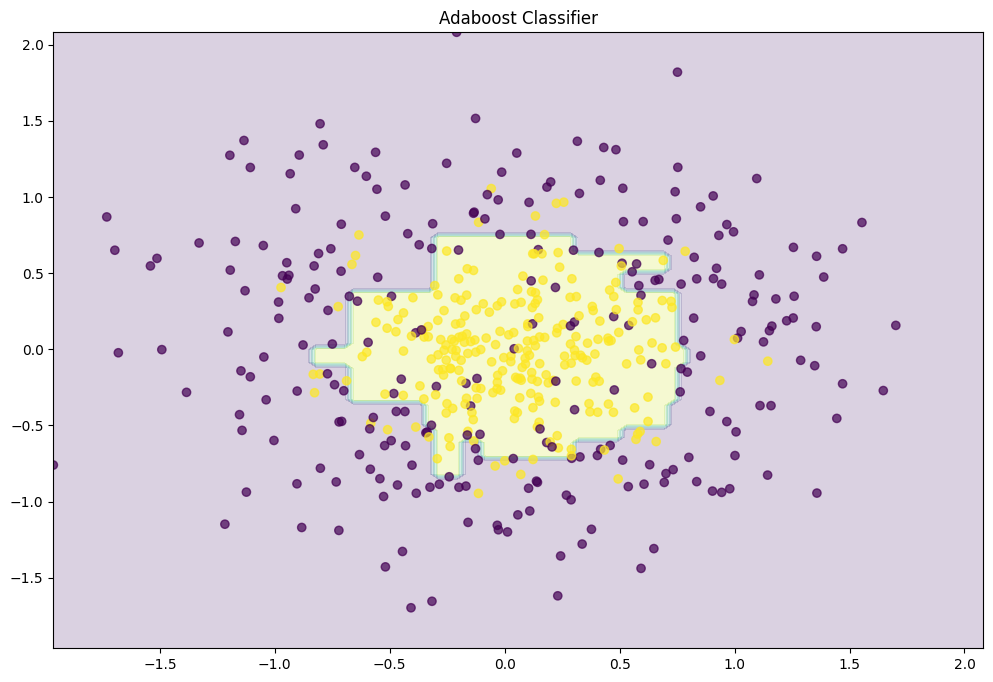

In [15]:
abc = AdaBoostClassifier(n_estimators=1000)
abc.fit(X,Y)
plot_decision_boundary(abc)

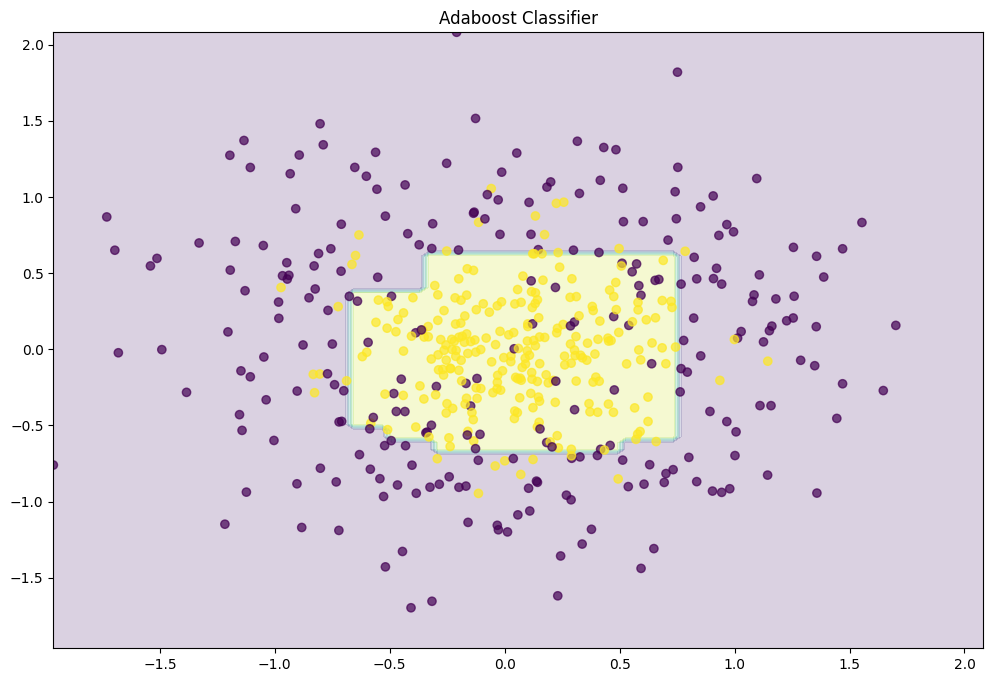

In [16]:
abc = AdaBoostClassifier(n_estimators=1000 , learning_rate=0.1)
abc.fit(X,Y)
plot_decision_boundary(abc)

In [17]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, Y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Li

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
